### Część podstawowa

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('fires_thefts.csv', names = ['fires', 'thefts'])

x = data[['fires']].to_numpy().flatten()
y = data[['thefts']].to_numpy().flatten()

def gradient_descent(h, cost_fun, theta, x, y, alpha, eps, max_steps = 1000000):
    current_cost = cost_fun(h, theta, x, y)
    log = [[current_cost, theta]]
    m = len(y)
    steps_counter = 0
    while True and steps_counter < max_steps:
        steps_counter += 1
        new_theta = [
            theta[0] - alpha/float(m) * sum(h(theta, x[i]) - y[i]
                                            for i in range(m)),   
            theta[1] - alpha/float(m) * sum((h(theta, x[i]) - y[i]) * x[i]
                                            for i in range(m))]
        theta = new_theta
        prev_cost = current_cost
        current_cost = cost_fun(h, theta, x, y)
        if abs(prev_cost - current_cost) <= eps:
            break
        log.append([current_cost, theta])
    return theta, log

def J(h, theta, x, y):
    m = len(y)
    return 1.0 / (2 * m) * sum((h(theta, x[i]) - y[i])**2 for i in range(m))

def h(theta, x):
    return theta[0] + theta[1] * x

def mse(expected, predicted):
    m = len(expected)
    if len(predicted) != m:
        raise Exception('Wektory mają różne długości!')
    return 1.0 / (2 * m) * sum((expected[i] - predicted[i])**2 for i in range(m))

best_theta, log = gradient_descent(h, J, [0.0, 0.0], x, y, alpha=0.001, eps=0.0000001, max_steps = 1000)

predicted_50 = h(best_theta, 50)
predicted_100 = h(best_theta, 100)
predicted_200 = h(best_theta, 200)
print(f'Predicted amount of thefts for 50 fires: {predicted_50}')
print(f'Predicted amount of thefts for 100 fires: {predicted_100}')
print(f'Predicted amount of thefts for 200 fires: {predicted_200}')

Predicted amount of thefts for 50 fires: 100.5454538681846
Predicted amount of thefts for 100 fires: 195.86844057898603
Predicted amount of thefts for 200 fires: 386.5144140005889


### Część zaawansowana

Predicted amount of thefts for 50 fires: 100.5454538681846
Predicted amount of thefts for 100 fires: 195.86844057898603
Predicted amount of thefts for 200 fires: 386.5144140005889


/var/folders/lm/cbc3n48n4x94zd3vf6zbbly40000gn/T/ipykernel_46472/1879637217.py:3: RuntimeWarning: overflow encountered in scalar power
  return 1.0 / (2 * m) * sum((h(theta, x[i]) - y[i])**2 for i in range(m))
/var/folders/lm/cbc3n48n4x94zd3vf6zbbly40000gn/T/ipykernel_46472/4224604797.py:25: RuntimeWarning: invalid value encountered in scalar subtract
  if abs(prev_cost - current_cost) <= eps:
/var/folders/lm/cbc3n48n4x94zd3vf6zbbly40000gn/T/ipykernel_46472/4224604797.py:20: RuntimeWarning: overflow encountered in scalar add
  theta[1] - alpha/float(m) * sum((h(theta, x[i]) - y[i]) * x[i]
/var/folders/lm/cbc3n48n4x94zd3vf6zbbly40000gn/T/ipykernel_46472/4224604797.py:20: RuntimeWarning: overflow encountered in scalar multiply
  theta[1] - alpha/float(m) * sum((h(theta, x[i]) - y[i]) * x[i]
/var/folders/lm/cbc3n48n4x94zd3vf6zbbly40000gn/T/ipykernel_46472/4224604797.py:20: RuntimeWarning: invalid value encountered in scalar subtract
  theta[1] - alpha/float(m) * sum((h(theta, x[i]) - y[i]

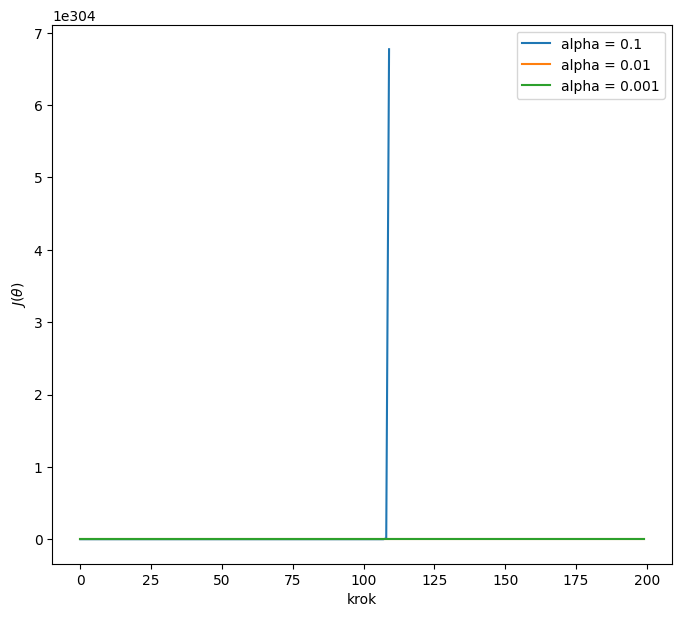

In [5]:
def J(h, theta, x, y):
    m = len(y)
    return 1.0 / (2 * m) * sum((h(theta, x[i]) - y[i])**2 for i in range(m))

def h(theta, x):
    return theta[0] + theta[1] * x

def mse(expected, predicted):
    m = len(expected)
    if len(predicted) != m:
        raise Exception('Wektory mają różne długości!')
    return 1.0 / (2 * m) * sum((expected[i] - predicted[i])**2 for i in range(m))

best_theta, log = gradient_descent(h, J, [0.0, 0.0], x, y, alpha=0.001, eps=0.0000001, max_steps = 1000)

predicted_50 = h(best_theta, 50)
predicted_100 = h(best_theta, 100)
predicted_200 = h(best_theta, 200)
print(f'Predicted amount of thefts for 50 fires: {predicted_50}')
print(f'Predicted amount of thefts for 100 fires: {predicted_100}')
print(f'Predicted amount of thefts for 200 fires: {predicted_200}')

best_theta_01, log_01 = gradient_descent(h, J, [0.0, 0.0], x, y, alpha = 0.1, eps = 0.0000001, max_steps = 1000)
best_theta_001, log_001 = gradient_descent(h, J, [0.0, 0.0], x, y, alpha = 0.01, eps = 0.0000001, max_steps = 1000)
best_theta_0001, log_0001 = gradient_descent(h, J, [0.0, 0.0], x, y, alpha = 0.001, eps = 0.0000001, max_steps = 1000)

steps_range = np.arange(0, 200, 1)
y_01, y_001, y_0001 = [], [], []
for step in steps_range:
    y_01.append(log_01[step][0])
    y_001.append(log_001[step][0])
    y_0001.append(log_0001[step][0])

fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111)
ax.plot(steps_range, y_01, label='alpha = 0.1')
ax.plot(steps_range, y_001, label='alpha = 0.01')
ax.plot(steps_range, y_0001, label='alpha = 0.001')
ax.legend(loc='best')
ax.set_xlabel('krok')
ax.set_ylabel(r'$J(\theta)$')
# plt.ylim([0, 800])
plt.show()